### Links

- GitHub: 


In [2]:
##Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data Prep

In [3]:
rawDF = pd.read_csv("milknew.csv")
rawDF.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


### Missingness

In [4]:
##Check for missing values
rawDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [4]:
rawDF.shape

(1059, 8)

In [5]:
rawDF['Grade'].value_counts()

Grade
low       429
medium    374
high      256
Name: count, dtype: int64

In [6]:
rawDF = rawDF.rename(columns={'Colour': 'Color', 'Temprature' : 'Temperature', 'Fat ' : 'Fat'})
var = ["pH", "Temperature", "Taste", "Odor", "Fat", "Turbidity", "Color"]
num = ['pH', 'Temperature', 'Color']

## Data Visualization

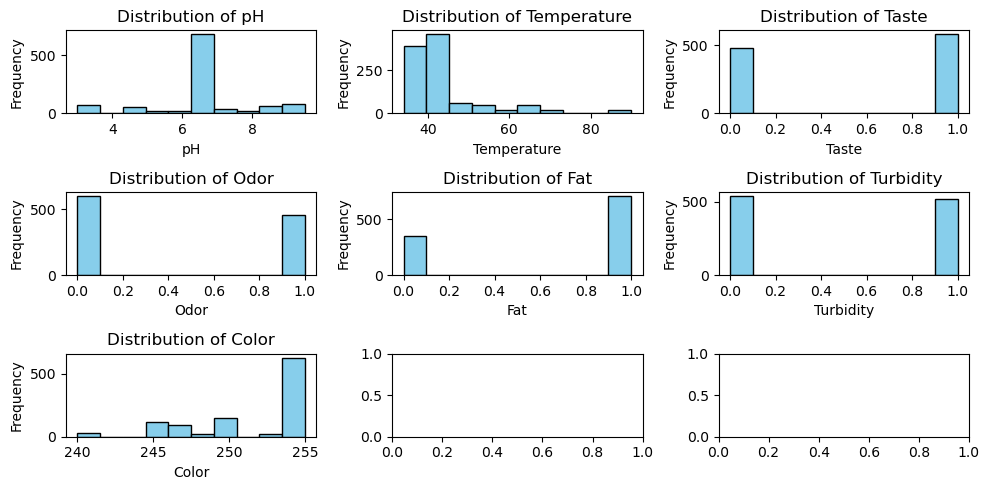

In [7]:
## distributions of variables
fig, axs = plt.subplots(3, 3, figsize=(10, 5))
axs = axs.flatten()

for i, col in enumerate(var):
    axs[i].hist(rawDF[col], bins=10, color='skyblue', edgecolor='black')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')
    axs[i].set_title('Distribution of ' + col)

plt.tight_layout()

## Outliers

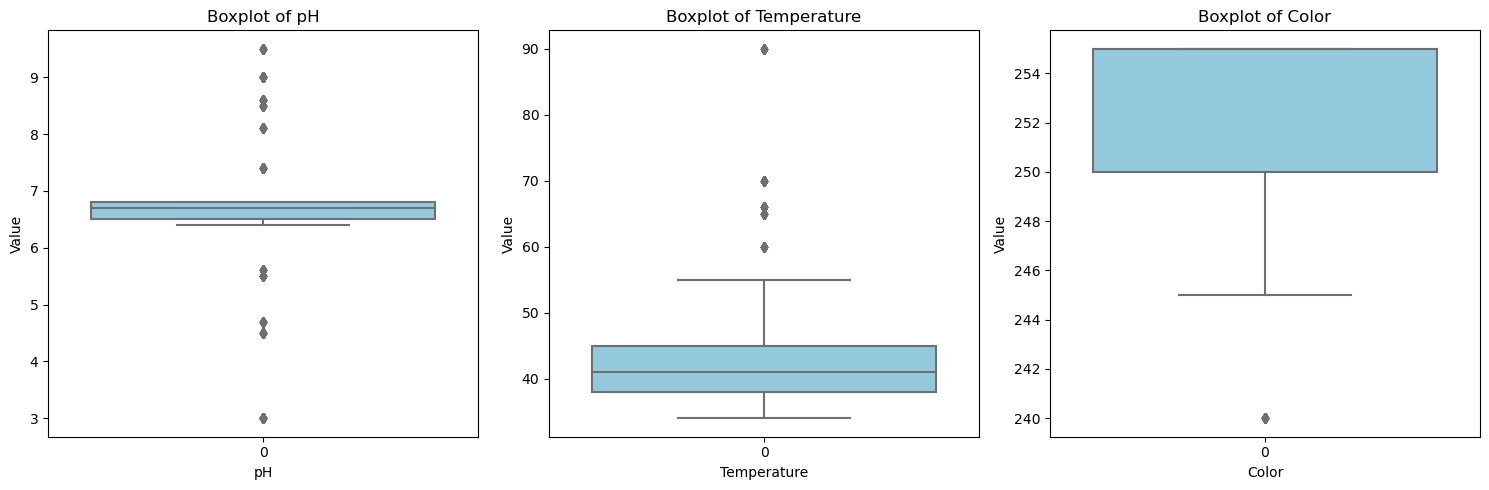

In [8]:
##box plots of variables
fig, axs = plt.subplots(1, len(num), figsize=(15, 5))

for i, col in enumerate(num):
    sns.boxplot(data=rawDF[col], ax=axs[i], color='skyblue')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Value')
    axs[i].set_title('Boxplot of ' + col)

plt.tight_layout()

In [9]:
def rmOutlier(DF, col_name):
    
    Q1 = np.percentile(DF[col_name], 25, method='midpoint')
    Q3 = np.percentile(DF[col_name], 75, method='midpoint')
    IQR = Q3 - Q1

    print(IQR)

    maxThreshold = Q3+1.5*IQR
    minThreshold = Q1-1.5*IQR

    outlierDF = DF[DF[col_name] < maxThreshold]
    outlierDF = outlierDF[outlierDF[col_name] > minThreshold]

    return outlierDF

In [10]:
rawDF.shape

(1059, 8)

In [11]:
TempDF = rmOutlier(rawDF, 'Temperature')
TempDF.shape

7.0


(956, 8)

In [12]:
pHDF = rmOutlier(TempDF, 'pH')
pHDF.shape

0.2999999999999998


(680, 8)

In [13]:
OutDF = rmOutlier(pHDF, 'Color')
OutDF.shape

8.0


(680, 8)

In [14]:
rawDF.shape

(1059, 8)

## Encode Milk Grade

In [15]:
from sklearn.preprocessing import LabelEncoder

OneHot = ['work_type', 'Residence_type', 'smoking_status']
Label = ['gender', 'ever_married']

labEnc = LabelEncoder()

rawDF['Grade'] = labEnc.fit_transform(rawDF['Grade'])

rawDF.head()

,pH,Temperature,Taste,Odor,Fat,Turbidity,Color,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2


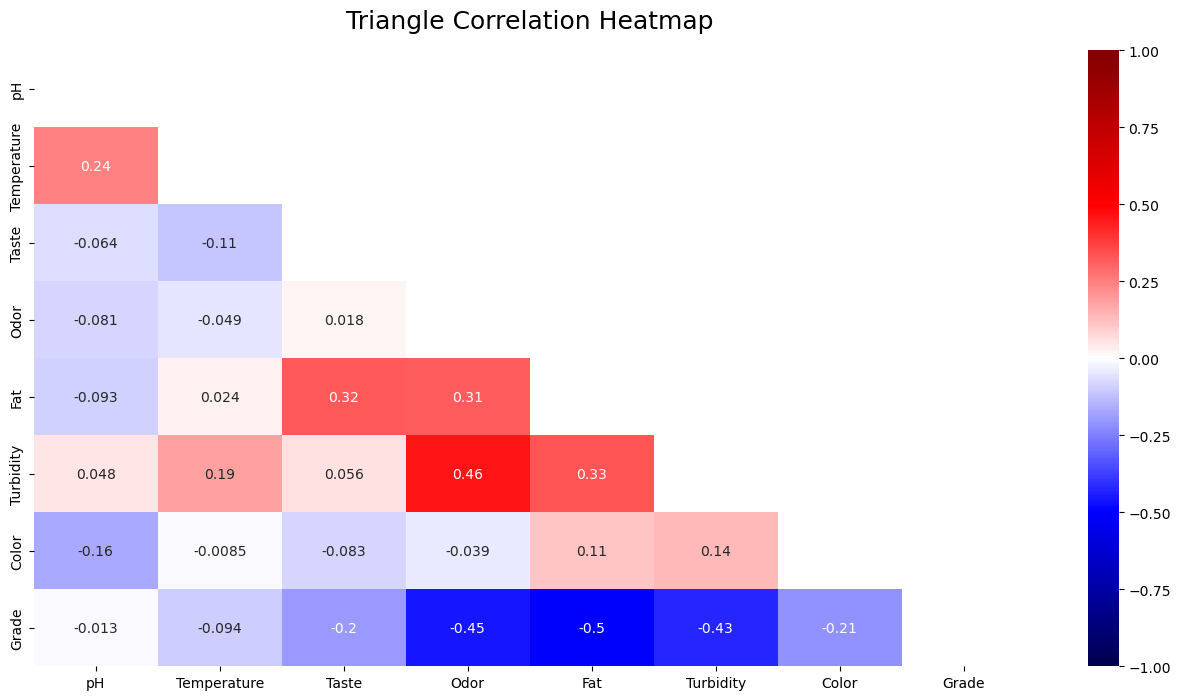

In [16]:
plt.figure(figsize=(16, 8))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(rawDF.corr(), dtype=bool))
heatmap = sns.heatmap(rawDF.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='seismic')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

## Split Data

In [17]:
yDF = rawDF["Grade"]
xDF = rawDF.drop(columns=["Grade"], axis=1)

print(xDF.columns)
xDF.head()

Index(['pH', 'Temperature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Color'], dtype='object')


,pH,Temperature,Taste,Odor,Fat,Turbidity,Color
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255


In [18]:
pd.DataFrame(yDF).head()

,Grade
0,0
1,0
2,1
3,1
4,2


## Training and Testing

In [19]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(xDF, 
    yDF,
    random_state=42,
    test_size = 0.3,
    shuffle=True)

xTrain.head()

,pH,Temperature,Taste,Odor,Fat,Turbidity,Color
5,6.6,37,1,1,1,1,255
310,6.6,37,1,1,1,1,255
557,4.7,38,1,0,1,0,255
104,5.6,50,0,1,1,1,255
97,6.5,37,0,0,0,0,255


## Scaling

In [20]:
from sklearn.preprocessing import StandardScaler

xScaler = StandardScaler()
xColNames = xTrain.columns.values.tolist()
# train the scaler and apply it to the training set
xTrainScaled = xScaler.fit_transform(xTrain[xColNames])
# xTestScaled = xScaler.transform(xTest[xColNames])

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

parameters = [{'penalty':['none','l2'], 
              'C':[.01, .1, 1]}]
gridSearch = GridSearchCV(estimator = LogisticRegression(),  
                           param_grid = parameters,
                           scoring = 'recall_macro',
                           cv = 5,
                           verbose=0)


gridSearch.fit(xTrainScaled, yTrain) 

logisticParams = gridSearch.best_params_

logisticParams

c:\Users\ethan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\ethan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\ethan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\ethan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\ethan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the

{'C': 1, 'penalty': 'l2'}

In [22]:
from sklearn.svm import SVC

parameters = {'C':[1,10,100,1000],
              'gamma':[1,0.1,0.001,0.0001], 
              'kernel':['linear','rbf']}
gridSearch = GridSearchCV(estimator = SVC(),  
                           param_grid = parameters,
                           scoring = 'recall_macro',
                           cv = 5,
                           verbose=0)


gridSearch.fit(xTrainScaled, yTrain) 

svmParams = gridSearch.best_params_

svmParams

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [23]:
from sklearn.neural_network import MLPClassifier

parameters = parameter_space = {
    'max_iter': [1000],
    'hidden_layer_sizes': [(50,50), (50,50,50), (100)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
gridSearch = GridSearchCV(estimator = MLPClassifier(),  
                           param_grid = parameters,
                           scoring = 'recall_macro',
                           cv = 5,
                           verbose=0)


gridSearch.fit(xTrainScaled, yTrain) 

mlpParams = gridSearch.best_params_

mlpParams

{'activation': 'relu',
 'alpha': 0.05,
 'hidden_layer_sizes': (50, 50),
 'learning_rate': 'adaptive',
 'max_iter': 1000,
 'solver': 'adam'}

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameters grid for Random Forest
rf_parameters = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 10, 20],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

# Perform GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(),  
                              param_grid=rf_parameters,
                              scoring='recall_macro',
                              cv=5,
                              verbose=0)

rf_grid_search.fit(xTrainScaled, yTrain)

# Get the best parameters for Random Forest
rfParams = rf_grid_search.best_params_

rfParams


{'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [25]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameters grid for AdaBoost
ada_parameters = {'n_estimators': [50, 100, 200],
                  'learning_rate': [0.01, 0.1, 1.0]}

# Perform GridSearchCV for AdaBoost
ada_grid_search = GridSearchCV(estimator=AdaBoostClassifier(),  
                               param_grid=ada_parameters,
                               scoring='recall_macro',
                               cv=5,
                               verbose=0)

ada_grid_search.fit(xTrainScaled, yTrain)

# Get the best parameters for AdaBoost
adaParams = ada_grid_search.best_params_

adaParams


{'learning_rate': 0.1, 'n_estimators': 200}

In [26]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [None, 10, 20, 30, 40, 50],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': [None, 'sqrt', 'log2']}

              
gridSearch = GridSearchCV(estimator = DecisionTreeClassifier(),  
                           param_grid = parameters,
                           scoring = 'recall_macro',
                           cv = 5,
                           verbose=0)


gridSearch.fit(xTrainScaled, yTrain) 

treeParams = gridSearch.best_params_

treeParams

{'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'splitter': 'random'}

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn_parameters = [{'n_neighbors': [3, 5, 7],
                   'weights': ['uniform', 'distance'],
                   'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                   'leaf_size': [20, 30, 40],
                   'p': [1, 2]}]

gridSearch_knn = GridSearchCV(estimator=KNeighborsClassifier(),  
                              param_grid=knn_parameters,
                              scoring='recall_macro',
                              cv=5,
                              verbose=0)

gridSearch_knn.fit(xTrainScaled, yTrain) 

knn_params = gridSearch_knn.best_params_

knn_params

{'algorithm': 'auto',
 'leaf_size': 20,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'distance'}

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

gbm_parameters = [{'learning_rate': [0.01, 0.1, 1],
                   'n_estimators': [50, 100, 200],
                   'subsample': [0.8, 1.0],
                   'min_samples_leaf': [1, 2, 4]}]

gridSearch_gbm = GridSearchCV(estimator=GradientBoostingClassifier(),  
                               param_grid=gbm_parameters,
                               scoring='recall_macro',
                               cv=5,
                               verbose=0)

gridSearch_gbm.fit(xTrainScaled, yTrain) 

gbm_params = gridSearch_gbm.best_params_

gbm_params

{'learning_rate': 0.1,
 'min_samples_leaf': 1,
 'n_estimators': 200,
 'subsample': 0.8}

## Retrain Models

In [29]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler

In [30]:
def HPmodel(params, model):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    accuracyScores = []
    f1Scores = []
    precisionScores = []
    recallScores = []

    for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):

        ### making training and validation sets
        # Convert indices to list
        trainIndex = trainIndex.tolist()
        valIndex = valIndex.tolist()
        
        # Split the data into training and validation sets for this fold
        xLocalTrain, xVal = xTrain.iloc[trainIndex], xDF.iloc[valIndex]
        yLocalTrain, yVal = yTrain.iloc[trainIndex], yDF.iloc[valIndex]


        ### feature scaling
        xScaler = StandardScaler()
        xColNames = xLocalTrain.columns.values.tolist()
        # train the scaler and apply it to the training set
        xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
        # apply the scaling to the validation set
        xValScaled = xScaler.transform(xVal[xColNames])

        ### model training
        # instantiate the model
        clf = model(**params)
        # Train the classifier on the training data
        clf.fit(xTrainScaled, yLocalTrain)
        
        ### model prediction and evaluation
        # Make predictions on the test data
        yPred = clf.predict(xValScaled)

        # Calculate metrics and store them
        score = accuracy_score(yVal, yPred)
        accuracyScores.append(score)

        score = f1_score(yVal, yPred, average='macro')
        f1Scores.append(score)

        score = precision_score(yVal, yPred, average= 'macro')
        precisionScores.append(score)

        score = recall_score(yVal, yPred, average='macro')
        recallScores.append(score)

        print(f"Completed Fold {i}")
        print(f"    Accuracy={accuracyScores[i]}    Recall={recallScores[i]}    FScore={f1Scores[i]}")

    ## Calculate the mean scores across all folds
    mean_score = sum(accuracyScores) / len(accuracyScores)
    print("Mean accuracy score:", mean_score)

    mean_score = sum(f1Scores) / len(f1Scores)
    print("Mean f1 score:", mean_score)

    mean_score = sum(precisionScores) / len(precisionScores)
    print("Mean precision score:", mean_score)

    mean_score = sum(recallScores) / len(recallScores)
    print("Mean recall score:", mean_score)

In [31]:
HPmodel(logisticParams, LogisticRegression)

Completed Fold 0
    Accuracy=0.8523489932885906    Recall=0.8486614262930052    FScore=0.8452233980011757
Completed Fold 1
    Accuracy=0.831081081081081    Recall=0.8153063725490196    FScore=0.8137744231379482
Completed Fold 2
    Accuracy=0.8445945945945946    Recall=0.8477421271538917    FScore=0.8414191172811862
Completed Fold 3
    Accuracy=0.8716216216216216    Recall=0.8703448275862069    FScore=0.8672719662577674
Completed Fold 4
    Accuracy=0.8243243243243243    Recall=0.8303100067479061    FScore=0.8095007112742665
Mean accuracy score: 0.8447941229820424
Mean f1 score: 0.8354379231904687
Mean precision score: 0.8361947195944823
Mean recall score: 0.8424729520660058


In [32]:
HPmodel(svmParams, SVC)

Completed Fold 0
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 1
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 2
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 3
    Accuracy=0.9932432432432432    Recall=0.9942528735632185    FScore=0.9929862229379137
Completed Fold 4
    Accuracy=0.9932432432432432    Recall=0.9945355191256832    FScore=0.9944440586151817
Mean accuracy score: 0.9972972972972972
Mean f1 score: 0.997486056310619
Mean precision score: 0.9972628726287261
Mean recall score: 0.9977576785377803


In [33]:
HPmodel(mlpParams, MLPClassifier)

Completed Fold 0
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 1
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 2
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 3
    Accuracy=0.9932432432432432    Recall=0.9942528735632185    FScore=0.993801119242359
Completed Fold 4
    Accuracy=1.0    Recall=1.0    FScore=1.0
Mean accuracy score: 0.9986486486486486
Mean f1 score: 0.9987602238484719
Mean precision score: 0.9986928104575163
Mean recall score: 0.9988505747126437


In [34]:
HPmodel(rfParams, RandomForestClassifier)

Completed Fold 0
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 1
    Accuracy=0.9797297297297297    Recall=0.9705882352941176    FScore=0.975495457574801
Completed Fold 2
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 3
    Accuracy=0.9932432432432432    Recall=0.9942528735632185    FScore=0.993801119242359
Completed Fold 4
    Accuracy=1.0    Recall=1.0    FScore=1.0
Mean accuracy score: 0.9945945945945945
Mean f1 score: 0.9938593153634321
Mean precision score: 0.9951030668677727
Mean recall score: 0.9929682217714673


In [35]:
HPmodel(adaParams, AdaBoostClassifier)

Completed Fold 0
    Accuracy=0.9530201342281879    Recall=0.9442355889724311    FScore=0.9477466746079015
Completed Fold 1
    Accuracy=0.9594594594594594    Recall=0.9537254901960784    FScore=0.9510204081632653
Completed Fold 2
    Accuracy=0.9662162162162162    Recall=0.9537037037037037    FScore=0.9572032311560478
Completed Fold 3
    Accuracy=0.8918918918918919    Recall=0.8733333333333334    FScore=0.8765432098765432
Completed Fold 4
    Accuracy=0.9594594594594594    Recall=0.9607728337236535    FScore=0.9497175141242936
Mean accuracy score: 0.9460094322510431
Mean f1 score: 0.9364462075856104
Mean precision score: 0.9398401583111806
Mean recall score: 0.93715418998584


In [36]:
HPmodel(treeParams, DecisionTreeClassifier)

Completed Fold 0
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 1
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 2
    Accuracy=0.9932432432432432    Recall=0.9907407407407408    FScore=0.9915598459671889
Completed Fold 3
    Accuracy=0.9932432432432432    Recall=0.9942528735632185    FScore=0.9929862229379137
Completed Fold 4
    Accuracy=0.9932432432432432    Recall=0.9945355191256832    FScore=0.9944440586151817
Mean accuracy score: 0.9959459459459458
Mean f1 score: 0.9957980255040567
Mean precision score: 0.9957813911472447
Mean recall score: 0.9959058266859285


In [37]:
HPmodel(knn_params, KNeighborsClassifier)

Completed Fold 0
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 1
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 2
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 3
    Accuracy=0.9932432432432432    Recall=0.9942528735632185    FScore=0.9929862229379137
Completed Fold 4
    Accuracy=0.9932432432432432    Recall=0.9945355191256832    FScore=0.9944440586151817
Mean accuracy score: 0.9972972972972972
Mean f1 score: 0.997486056310619
Mean precision score: 0.9972628726287261
Mean recall score: 0.9977576785377803


In [38]:
HPmodel(gbm_params, GradientBoostingClassifier)

Completed Fold 0
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 1
    Accuracy=0.9932432432432432    Recall=0.9901960784313726    FScore=0.9917245455888871
Completed Fold 2
    Accuracy=0.9932432432432432    Recall=0.9907407407407408    FScore=0.9915598459671889
Completed Fold 3
    Accuracy=0.9932432432432432    Recall=0.9942528735632185    FScore=0.9929862229379137
Completed Fold 4
    Accuracy=1.0    Recall=1.0    FScore=1.0
Mean accuracy score: 0.995945945945946
Mean f1 score: 0.9952541228987979
Mean precision score: 0.9955853127158723
Mean recall score: 0.9950379385470665


## Retrain best models on testing set not used

In [39]:
### feature scaling
xScaler = StandardScaler()
# train the scaler and apply it to the training set
xTrainScaled = xScaler.fit_transform(xTrain[xColNames])
# apply the scaling to the testing set
xTestScaled = xScaler.transform(xTest[xColNames])

In [71]:
################ 
# Log Reg
################
clf = LogisticRegression(**logisticParams)
clf.fit(xTrainScaled, yTrain)

preds = clf.predict(xTestScaled)

logAccuracy = accuracy_score(yTest, preds)
logFScore = f1_score(yTest, preds, average='macro')
logPrecision = precision_score(yTest, preds, average='macro')
logRecall = recall_score(yTest, preds, average='macro')

################ 
# Neural Net
################
clf = MLPClassifier(**mlpParams)
clf.fit(xTrainScaled, yTrain)

preds = clf.predict(xTestScaled)

nnAccuracy = accuracy_score(yTest, preds)
nnFScore = f1_score(yTest, preds, average='macro')
nnPrecision = precision_score(yTest, preds, average='macro')
nnRecall = recall_score(yTest, preds, average='macro')


################ 
# SVM
################

clf = SVC(**svmParams)
clf.fit(xTrainScaled, yTrain)

preds = clf.predict(xTestScaled)

svmAccuracy = accuracy_score(yTest, preds)
svmFScore = f1_score(yTest, preds, average='macro')
svmPrecision = precision_score(yTest, preds, average='macro')
svmRecall = recall_score(yTest, preds, average='macro')

################ 
# Random Forrest
################

clf = RandomForestClassifier(**rfParams)
clf.fit(xTrainScaled, yTrain)

preds = clf.predict(xTestScaled)

rfAccuracy = accuracy_score(yTest, preds)
rfFScore = f1_score(yTest, preds, average='macro')
rfPrecision = precision_score(yTest, preds, average='macro')
rfRecall = recall_score(yTest, preds, average='macro')

################ 
# AdaBoost
################

clf = AdaBoostClassifier(**adaParams)
clf.fit(xTrainScaled, yTrain)

preds = clf.predict(xTestScaled)

adaAccuracy = accuracy_score(yTest, preds)
adaFScore = f1_score(yTest, preds, average='macro')
adaPrecision = precision_score(yTest, preds, average='macro')
adaRecall = recall_score(yTest, preds, average='macro')

################ 
# Tree
################

clf = DecisionTreeClassifier(**treeParams)
clf.fit(xTrainScaled, yTrain)

preds = clf.predict(xTestScaled)

treeAccuracy = accuracy_score(yTest, preds)
treeFScore = f1_score(yTest, preds, average='macro')
treePrecision = precision_score(yTest, preds, average='macro')
treeRecall = recall_score(yTest, preds, average='macro')

################ 
# kNN
################

clf = KNeighborsClassifier(**knn_params)
clf.fit(xTrainScaled, yTrain)

preds = clf.predict(xTestScaled)

kNNAccuracy = accuracy_score(yTest, preds)
kNNFScore = f1_score(yTest, preds, average='macro')
kNNPrecision = precision_score(yTest, preds, average='macro')
kNNRecall = recall_score(yTest, preds, average='macro')

################ 
# GBM
################

clf = GradientBoostingClassifier(**gbm_params)
clf.fit(xTrainScaled, yTrain)

preds = clf.predict(xTestScaled)

GBMAccuracy = accuracy_score(yTest, preds)
GBMFScore = f1_score(yTest, preds, average='macro')
GBMPrecision = precision_score(yTest, preds, average='macro')
GBMRecall = recall_score(yTest, preds, average='macro')

scoreDict = {"model" : ["Log Reg", "Neural Network", "SVM", "Tree", "RF", "AdaBoost", "kNN", "GBM"],
            "accuracy" : [logAccuracy, nnAccuracy, svmAccuracy, treeAccuracy, rfAccuracy, adaAccuracy, kNNAccuracy, GBMAccuracy],
            "fScore" : [logFScore, nnFScore, svmFScore, treeFScore, rfFScore, adaFScore, kNNFScore, GBMFScore],
            "precision" : [logPrecision, nnPrecision, svmPrecision, treePrecision, rfPrecision, adaPrecision, kNNPrecision, GBMPrecision],
            "recall" : [logRecall, nnRecall, svmRecall, treeRecall, rfRecall, adaRecall, kNNRecall, GBMRecall]}

# Check if any evaluation metric is missing for any model
max_length = max(len(scoreDict[key]) for key in scoreDict.keys())
for key in scoreDict.keys():
    if len(scoreDict[key]) < max_length:
        # Fill missing values with None or a placeholder
        scoreDict[key].extend([None] * (max_length - len(scoreDict[key])))

resultsDF = pd.DataFrame.from_dict(scoreDict)

resultsDF

,model,accuracy,fScore,precision,recall
0,Log Reg,0.849057,0.841631,0.839741,0.848772
1,Neural Network,0.996855,0.996366,0.995671,0.997101
2,SVM,0.993711,0.992715,0.992715,0.992715
3,Tree,0.990566,0.989172,0.990053,0.988330
4,RF,0.993711,0.993590,0.993067,0.994203
5,AdaBoost,0.915094,0.900123,0.920825,0.890385
6,kNN,0.996855,0.996366,0.995671,0.997101
7,GBM,0.993711,0.992851,0.993010,0.992715


ChatGPT citation:

- Prompt: How can I export a pandas DF as a scholarly table in PDF form?

In [42]:
pip install reportlab

Note: you may need to restart the kernel to use updated packages.


In [72]:
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle
from tabulate import tabulate
import pandas as pd

resultsDF['accuracy'] = (resultsDF['accuracy'].round(3))
resultsDF['fScore'] = (resultsDF['fScore'].round(3))
resultsDF['precision'] = (resultsDF['precision'].round(3))
resultsDF['recall'] = (resultsDF['recall'].round(3))

# Convert DataFrame to a list of lists for tabulate
table = resultsDF.values.tolist()

# Add the column names as the first row
table.insert(0, resultsDF.columns.tolist())

# Define table style
style = TableStyle([('BACKGROUND', (0, 0), (-1, 0), colors.gray),
                    ('TEXTCOLOR', (0, 0), (-1, 0), colors.white),
                    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
                    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
                    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
                    ('BACKGROUND', (0, 1), (-1, -1), colors.beige),
                    ('GRID', (0, 0), (-1, -1), 1, colors.black)])

# Specify the file path
pdf_filename = r"C:\Users\ethan\OneDrive\Desktop\Berry Spring 24\DAT 350\FP\scholarly_table.pdf"

# Create PDF
pdf = SimpleDocTemplate(pdf_filename, pagesize=letter)
table_data = Table(table)

# Apply table style
table_data.setStyle(style)

# Build PDF
pdf.build([table_data])

print(f"PDF saved as {pdf_filename}")

PDF saved as C:\Users\ethan\OneDrive\Desktop\Berry Spring 24\DAT 350\FP\scholarly_table.pdf
